In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

The data set contains 33 columns.  The data set contains data about possible 
cancer cells.  Each entry corresponds to a cell mass in a patients body.
Images of each cell mass was taken and gray-scaled.  This data set contains 
numerical measures extracted from the images by using computers.  
Attribute Descriptions:
1. Diagnosis --> M(Malignant) or B(Benign) cell mass.  These are class labels
2. ID number --> a unique identifier for each cell mass
3. Radius --> distances from center to edge of the cell mass
4. Texture --> standard deviation of gray-scale values
5. perimeter --> distance around the cell mass
6. area --> area of cell mass
7. Smoothness --> local variation in the radius length from center to 
different points on the edge of the mass
8. compactness --> (perimeter^2)/(area-1)
9. concavity --> a measure of severity of concave portions of the contour
10. concave points --> number of concave points on the edge of the mass
11. symmetry
12. fractal dimension

Each of these attributes have 3 different columns.  What I mean by this is
that theres a radius_mean, radius_se, and radius_worst.  This is done for
each attribute.  So, radius_mean is the mean estimate of the radius of cell
mass.  We don't know the precise radius, but we use image analysis to 
figure out a value.  radius_se is the standard error of the estimate of the
cell mass radius.  Lastly, radius_worst is the worst case estimate of the 
radius.  I'm not 100% sure if this is right because there are no descriptions. 

The data set is already cleaned.  So that step will be skipped and all techniques related to data cleaning are not included.  

In [50]:
data = pd.read_csv("C:/Users/Norman/Desktop/Code_Repo/Python_Projects/data/breast_cancer_wisconsin.csv")
# The following displays the top 5 rows and all columns.
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The id attribute is useless because the numbers offer no value to predicting the diagnosis.  Therefore, I drop that column.

In [51]:
data.drop("id", axis=1, inplace=True)

I see that the column unnamed: 32 has 0 non null values.  I conclude that
this attribute is useless and should be removed.  

In [52]:
data.drop("Unnamed: 32", axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The only attribute inputs of interest are the means.  The reason being is that it does not make sense to look at the standard error or the worst case value of the measurement.

In [53]:
attribute_mean = list(data.columns[1:11])

Class labels need to be turned into integers because sklearn library uses
numbers to represent classes. M = 0 and B = 1

In [54]:
data['diagnosis'] = data['diagnosis'].map({'M':0, 'B':1})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We create a bar graph with y axis being the frequency of the observed value to
look at the distribution of the class.  It is important to see how skewed it is.  A little skewness is not a problem.

The plot shows that there is more benign data points than there are 
malignant.  However, it does not look like it is terrible, so it might be
possible to ignore the slight skewness in the class labels.  In other words,
the skewness might not have a huge impact on the accuracy measure.  

Text(0, 0.5, 'Class')

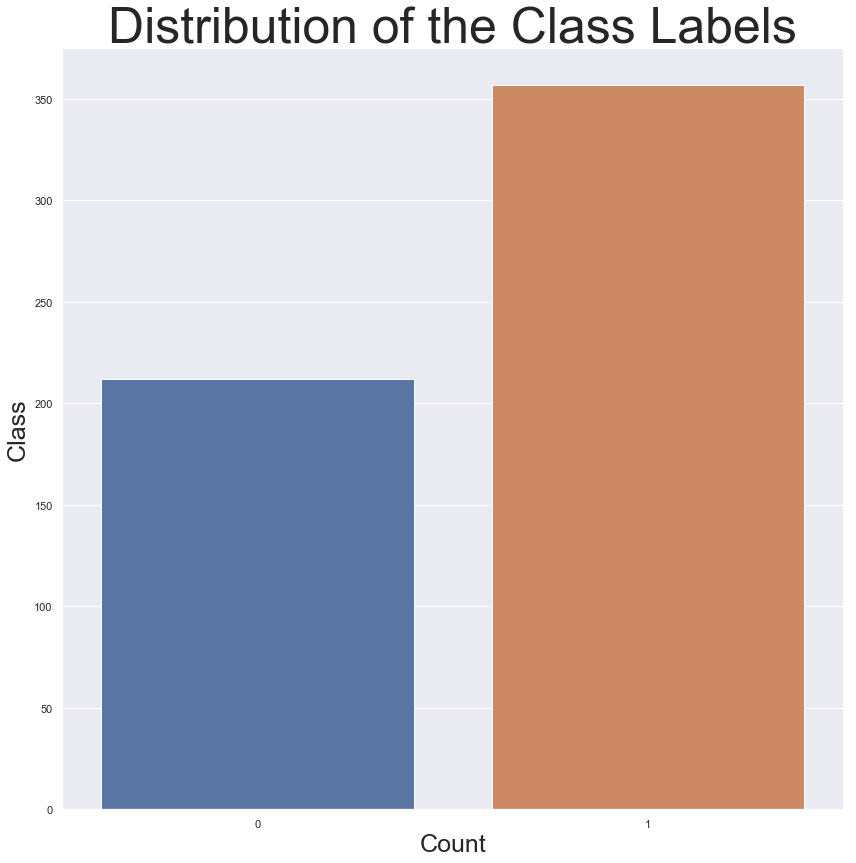

In [91]:
sns.countplot(x=data['diagnosis'], label='Count')
plt.title("Distribution of the Class Labels", size=50)
plt.xlabel("Count", size=25)
plt.ylabel("Class", size=25)

# 1. feature selection using correlation coefficient to eliminate redundant attributes:

The correlation matrix is a n by n matrix where n is the number
of attributes in the dataframe.  It is preferred to choose variables that are not correlated because correlated variables are redundant.  Redundant attributes are those that capture the same information.  Look at perimeter, radius, and area.  These attributes are strongly correlated because they capture the same information.  The information these 3 attributes capture is the shape of the cell mass.  The correlation coefficients show that radius, perimeter and area are highly correlated with a coefficient of 1.  Therefore, it does not make sense to use all 3 attributes, so we choose 1 out of the 3.  
We see that compactness, concavity, and concave points are highly correlated with correlation coefficients around .8 and .9.  Also, notice that concave points is correlated with radius, texture and perimeter.  

Note that this is not a good method of determining 
multicollinearity because this only looks at pairwise correlations.  
Multicollinearity occurs when independent variable x1 is highly 
correlated to another independent variable x2 when controlling for all other
independent variables.  

A drawback for using correlation is that if 2 features are not linearly
correlated, then the correlation coefficent wil be near 0.  However, the two
attributes could be non-linearly correlated.  This means that the two
attributes are still redundant, but the correlation coeefficient will not
capture it.

Note that there is no definite cut off for when an attribute is redundant or not.  This is all up to the data scientist to decide.  The best method is to test different attributes and see which gives better results.  The correlation matrix is more of a guide to determine which attributes to test.  

It is not clearly stated in doron zeilberger's notes, but the way correlation 
is used in math means that a 1 increase in x is correlated to 1 increase in y.
In other words, correlation by itself denotes linear correlation.  This is what
correlation means in doron zeilberger notes and in the field of math.  We have to explicitly state that we are talking about a non-linear correlation.  Non-linear correlation is not captured by the correlation coefficient used in 
probability theory.  In fact, I do not think there is a non-linear correlation
coefficient.  This is why correlation automatically means linear correlation.  

Note that we can create a scatter plot matrix and see if a non-linear or a 
linear relationship exists.

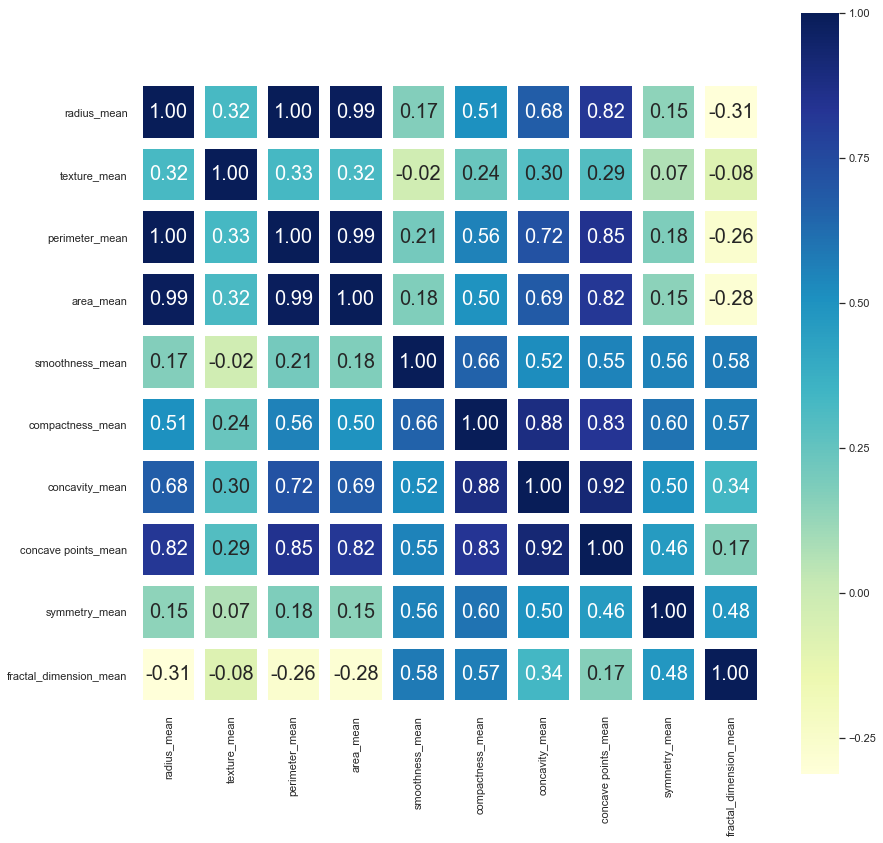

In [57]:
corr = data[attribute_mean].corr()
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={
    'size':20}, xticklabels=attribute_mean, yticklabels=attribute_mean,
    cmap='YlGnBu', linewidths=10)
plt.show()

Based on the correlation matrix, I select radius_mean and ignore
perimeter_mean and ignore area_mean.  Select texture_mean because it is not
strongly correlated to other attributes.  Select smoothness_mean because it is 
not strongly correlated to other attributes.  Select compactness_mean over
concavity_mean and concave points_mean because it is only correlated to 
concavity_mean, concave points_mean and not the other variables.  select symmetry_mean and select fractal_dimension_mean. 

So now, I create a list of input parameters.

In [58]:
input_params = ['radius_mean', 'texture_mean', 'smoothness_mean',
                'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']

train_test_split method from sklearn.model_selection class is used to split
the data into train and test sets.

In [62]:
train, test = train_test_split(data, test_size=.3)

Now, I'm separating the train and test sets into 2 more subsets each.
There needs to be an input data set for train data and label data set for 
train data.  There also needs to be an input data set for test data and label
data set for test data.

In [63]:
train_x = train[input_params]
train_y = train.loc[:,'diagnosis']
test_x = test[input_params]
test_y = test.loc[:,'diagnosis']

Finding the accuracy for a random forest model using features selected
from correlation matrix method.

In [64]:
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(train_x, train_y)
prediction = randomForest_model.predict(test_x)
print(metrics.accuracy_score(prediction, test_y))

0.9005847953216374


Finding the accuracy for a SVM model using features selected
from correlation matrix method.

In [66]:
svm_model = svm.SVC(gamma='scale')
svm_model.fit(train_x, train_y)
prediction = svm_model.predict(test_x)
print(metrics.accuracy_score(prediction, test_y))

0.8888888888888888


Checking the accuracy of random forest classifier and SVM classifier before feature selection. 

Observation:
The small increase in the accuracy of Random Forest model does not mean it is better to use all the features.  The reason being is that when the data set is large or when the feature set is large, it would take a lot of time to create the model.  It is good practice to stick to a simplier model even in this context.  
In the case of the svm model, the features selection generated a better model because the accuracy is higher.  

In [75]:
input_params = attribute_mean
train_x = train[input_params]
test_x = test[input_params]
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(train_x, train_y)
prediction = randomForest_model.predict(test_x)
print("Random Forest:", metrics.accuracy_score(prediction, test_y))
svm_model = svm.SVC(gamma='scale')
svm_model.fit(train_x, train_y)
prediction = svm_model.predict(test_x)
print("SVM:", metrics.accuracy_score(prediction, test_y))

Random Forest: 0.9239766081871345
SVM: 0.8771929824561403


# 2 feature selection using the random forest classifier:
The random forest classifier ranks the features from most important to least:
concave points_mean, perimeter_mean, radius_mean, area_mean, concavity_mean...
Each trial might differ because when two attributes are correlated it distorts the rankings. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

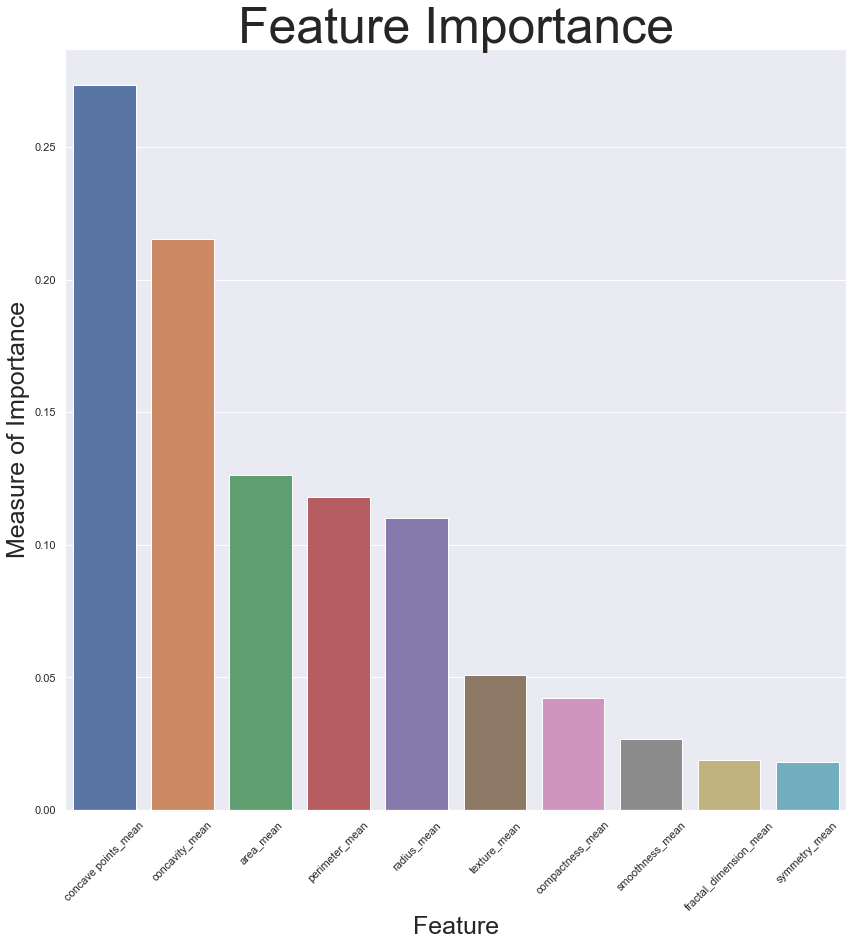

In [86]:
featrank = pd.Series(randomForest_model.feature_importances_,index=input_params
                     ).sort_values(ascending=False)
sns.barplot(x=featrank.index, y=featrank.values)
plt.title("Feature Importance", size=50)
plt.xlabel("Feature", size=25)
plt.ylabel("Measure of Importance", size=25)
plt.xticks(rotation=45)

Now I'm using the top features that were determined by the random
forest model for the SVM classifier, and we're seeing if the accuracy 
changes when using less features compared to using all features.

Observations:
The accuracy of SVM is higher when we use the high ranked features that were determined by the random forest classifier than using all features.  Depending on the run, the accuracy might have stayed relatively the same.  However, the accuracy is a little lower than the correlation matrix feature selection method.  Using the features selected from the correlation matrix method, the svm classifier betterr results.

In [93]:
# input_params contain the parameters selected from the random forest 
# classifier.
input_params = ['concave points_mean', 'perimeter_mean', 'radius_mean',
                'area_mean', 'concavity_mean']
train_x = train[input_params]
test_x = test[input_params]
randomForest_model = RandomForestClassifier(n_estimators=100)
randomForest_model.fit(train_x, train_y)
prediction = randomForest_model.predict(test_x)
print("Random Forest:", metrics.accuracy_score(prediction, test_y))
svm_model = svm.SVC(gamma='scale')
svm_model.fit(train_x, train_y)
prediction = svm_model.predict(test_x)
print("SVM:", metrics.accuracy_score(prediction, test_y))

Random Forest: 0.9181286549707602
SVM: 0.8771929824561403
